In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
import pandas as pd

train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_test.csv')

train_data.head()

HTTPError: HTTP Error 404: Not Found

In [14]:

train_data.info()
print('-'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------


NameError: name 'data_test' is not defined

<Axes: ylabel='Survived'>

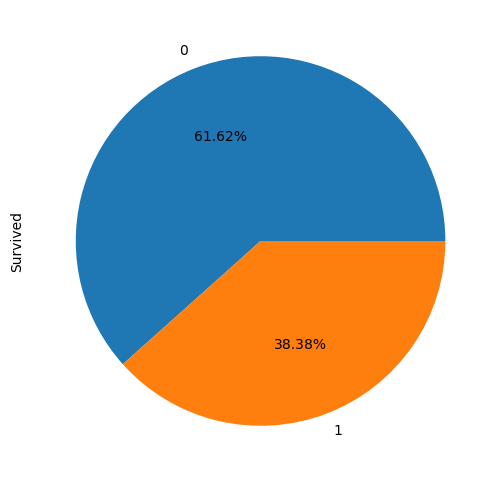

In [23]:
# First look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

<Axes: ylabel='Survived'>

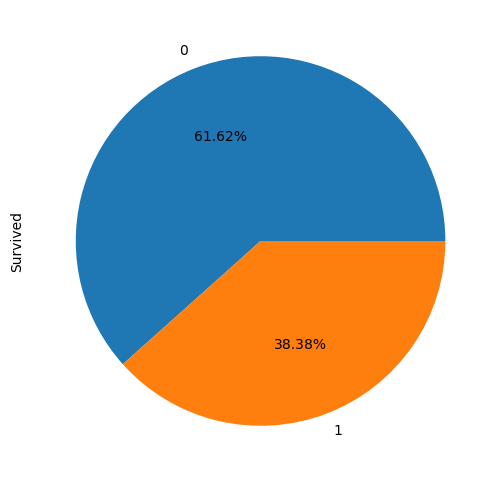

In [24]:
# First look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [27]:
train_data.loc[train_data['Embarked'].isnull(), 'Embarked'] = train_data['Embarked'].dropna().mode().values[0]

In [28]:
train_data['Cabin'] = train_data['Cabin'].fillna('U0') 


In [29]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [30]:
# Next, look at the complementary data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

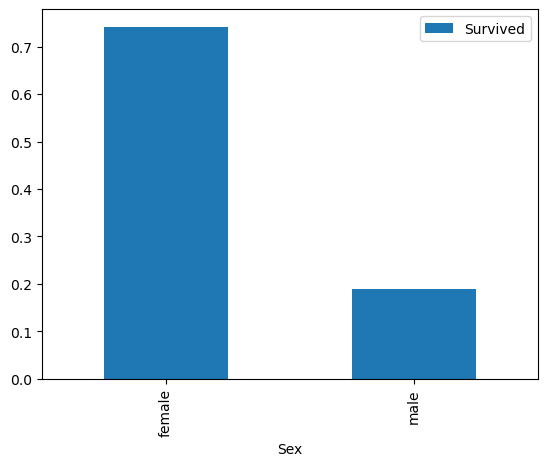

In [32]:
survived_by_sex = train_data[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

In [33]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

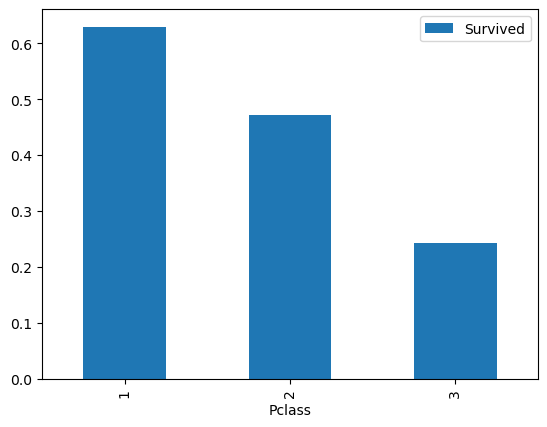

In [34]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()


In [35]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()


Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass,Sex'>

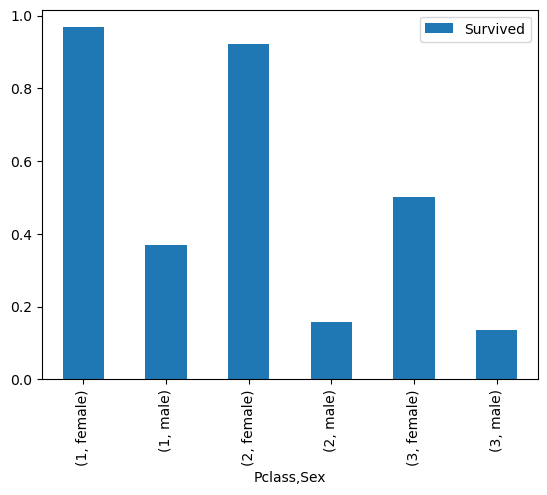

In [36]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()


<Axes: xlabel='Sex', ylabel='Age'>

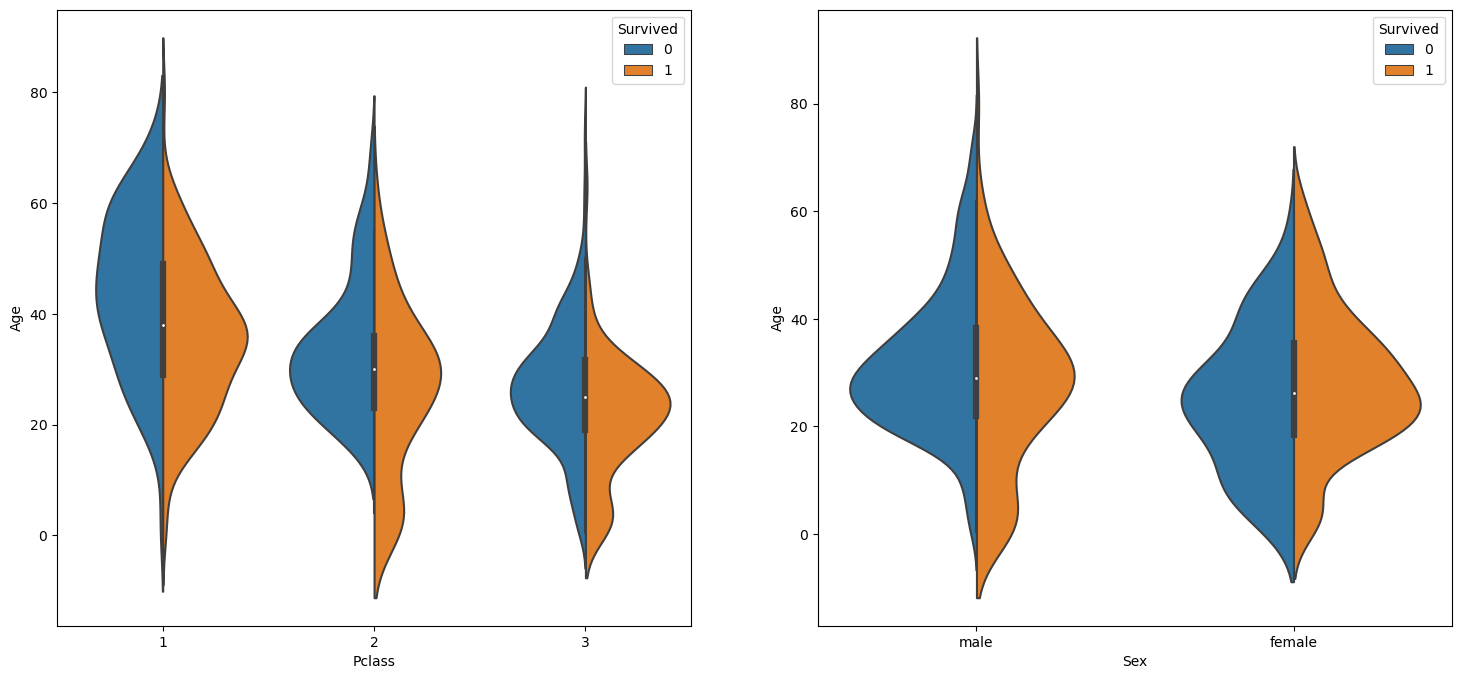

In [38]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=train_data, split=True, ax=ax[0])
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax[1])


<Axes: >

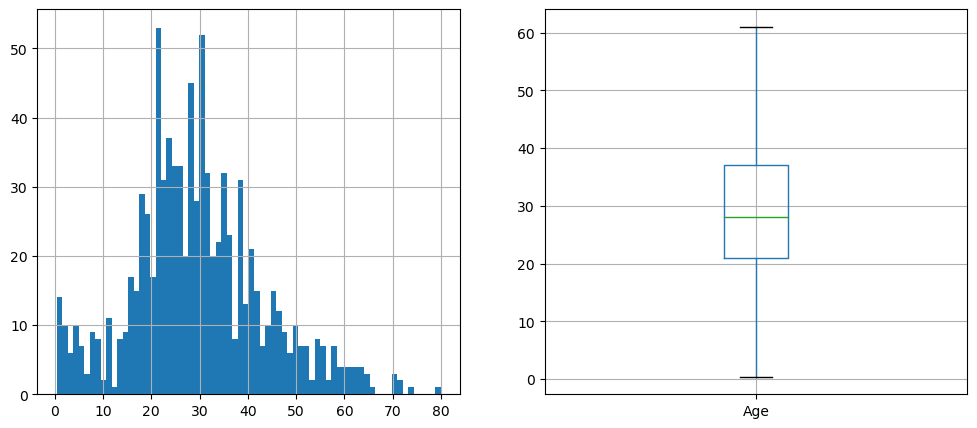

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)

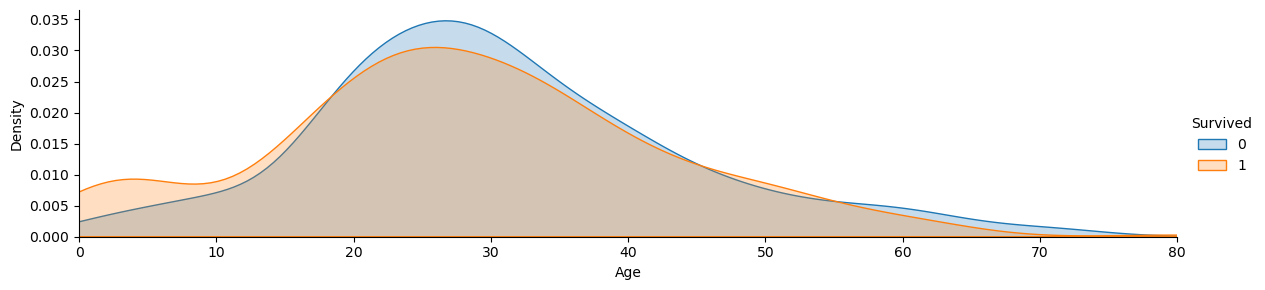

In [44]:
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
